In [409]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io

In [410]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/MyDrive/Colab Notebooks/IA/Redes_Neuronales/"

In [411]:
# Importar funciones de archivos .py
from RandParametros import randParametros
from fming import fmincg # función de optimización
from organizarBeta import organizarBeta
from sigmoid import sigmoid
from sigmoidGradiente import sigmoidGradiente


In [412]:
mat = scipy.io.loadmat('datos4.mat')
x_data = mat['X']; #5000 X 400
y_data = mat['y']; #5000 X 1
y_data[y_data == 10] = 0; #cambiamos todas las Y = 10 por Y = 0
#print(y_data[:, 0])

La imagen corrsponde al número: [0]


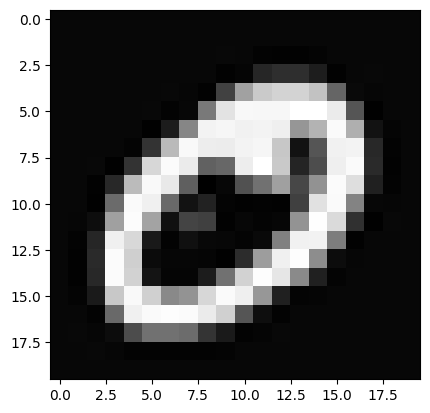

In [413]:
#Es una celda opcional, para tener un ejemplo para visualizar imagenes
cont = 0
DatSetImage = np.zeros((20,20)) # Es la matriz que contiene cada pixel de la imagen a pintar
ImageNumber = 499 #Número de imagen que quiero visualizar

for i in range(20):
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont]
    cont+=1

plt.imshow(DatSetImage, cmap='gray')
print('La imagen corrsponde al número:',y_data[ImageNumber])

In [414]:
#Dividir datos en Entrenamiento en 70% y 30%, se entrena con el 70% y se calculan las metricas con el 30%
x_data_30 = np.zeros((0, x_data.shape[1]))
y_data_30 = np.zeros((0, y_data.shape[1]))

x_data_70 = np.zeros((0, x_data.shape[1]))
y_data_70 = np.zeros((0, y_data.shape[1]))

for i in range(0, x_data.shape[0], 500):
    x_data_30 = np.vstack((x_data_30, x_data[i:i+int(0.3*500), :]))
    x_data_70 = np.vstack((x_data_70, x_data[i+int(0.3*500):i+500, :]))

for i in range(0, y_data.shape[0], 500):
    y_data_30 = np.vstack((y_data_30, y_data[i:i+int(0.3*500), :]))
    y_data_70 = np.vstack((y_data_70, y_data[i+int(0.3*500):i+500, :]))

In [415]:
#Calcular la m a partir de x_data_30
m = x_data_70.shape[0]
print(m)

Beta1_grad = 0;
Beta2_grad = 0;

tamano_capa_entrada  = 400;
tamano_capa_media = 25;
num_salidas =  10;

3500


In [416]:
#Inicializar las matrices Beta con datos random
Beta1_inicial = randParametros(tamano_capa_entrada,tamano_capa_media);
Beta2_inicial = randParametros(tamano_capa_media, num_salidas);

parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial),axis=None)
# print(parametros_Beta_Iniciales.shape)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],))
# print(parametros_Beta_Iniciales.shape)

In [417]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Iniciales)

# Funciones principales

In [418]:
#Propagacion hacia adelante (Forward Propagation)
def forwardPropagation(t, x):
    x1 =x[t,:] #1X400 --- con reshape dejamos el vector con tamaño de (400,1) y no de (400,)

    #De capa 1 a capa 2
    a1 = np.reshape(np.concatenate((1,x1),axis=None),(401,1)) #401x1
    z2 = np.dot(Beta1, a1) #(25,1)
    a2 = sigmoid(z2) #(25,1)

    #De capa 2 a capa 3
    a2 = np.reshape(np.concatenate((1,a2),axis=None),(26,1))# 26X1    
    z3 = np.dot(Beta2, a2) # 10x1
    a3 = np.reshape(sigmoid(z3),(10,1)) # 10x1 es la salida

    # print('a1',a1.shape)
    # print('a2',a2.shape)
    # print('a3',a3.shape)
    return (a1, a2, a3, z2)

In [419]:
#Propagacion hacia atras (Back Propagation)
def backPropagation(a3, valorY, z2):
    d3 = a3 - valorY; #debe ser 10x1
    d2 = np.multiply((np.dot(Beta2[:,1:].transpose(),d3)),np.reshape(sigmoidGradiente(z2),(z2.shape[0],z2.shape[1]))) #debe ser 25x1

    # print('d3',d3.shape)
    # print('d2',d2.shape)
    
    return (d2, d3)

# Entrenamiento de la Red Neuronal

In [420]:
#Esta celda debe ser finalizada TAREA
def nnTraining(nn_params,tamano_capa_entrada,tamano_capa_media,num_salidas, x, y, Lambda, m):
    [Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,nn_params)
    acumulador1 = 0
    acumulador2 = 0
    J_part_1 = 0
    for t in range(m):
        #Propagacion hacia adelante
        a1, a2, a3, z2 = forwardPropagation(t, x) # 10x1        

        #Paso intermedio (Creación del vector de ceros que indica con un uno la posición correspondiente a la salida correspondiente)
        y_data_vector = np.zeros((a3.shape[0],a3.shape[1])) # 10x1
        valorY = int(y[t,0]) # Número de la salida que corresponde a la imagen
        y_data_vector[valorY] = 1 # 10x1

        #Propagacion hacia atras
        d2, d3 = backPropagation(a3, valorY, z2)        
        
        #Acumuladores
        acumulador1 += np.dot(a1, d2.transpose()) # 401x25
        # print('acumulador1',acumulador1.shape)

        acumulador2 += np.dot(a2, d3.transpose()) # 26x10
        # print('acumulador2',acumulador2.shape)        
        
        #Funcion cost(J) parte 1 
        J_part_1 += np.sum((np.multiply(y_data_vector, np.log(a3))) + (np.multiply(1 - y_data_vector, np.log(1 - a3))))
        # print('j_part_1',j_part_1)

    #Funcion cost(J) parte 2
    sumaB1 = np.sum(np.square(Beta1[:, 1:]))
    sumaB2 = np.sum(np.square(Beta2[:, 1:]))
    J = (-1 / m) * J_part_1 + ((Lambda / (2 * m)) * (sumaB1 + sumaB2))



    #Calculamos gradientes
    tempBeta1 = np.copy(Beta1)
    tempBeta1[:, 0] = 0
    Beta1_grad = (1 / m) * (acumulador1.transpose() + (Lambda * tempBeta1)) # 25 x 401

    tempBeta2 = np.copy(Beta2)
    tempBeta2[:, 0] = 0
    Beta2_grad = (1 / m) * (acumulador2.transpose() + (Lambda * tempBeta2)) # 10x26

    grad = np.concatenate((Beta1_grad,Beta2_grad),axis=None)
    #tam = grad.size
    #grad.resize(tam,1)
    retornar = [J,grad]

    return retornar

In [421]:
#Celda de prueba
# m=1
Lambda = 0.1
retornar = nnTraining(parametros_Beta_Iniciales, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_70, y_data_70, Lambda, m)
print(retornar[0])

7.041915312141018


In [422]:
def costFunction(p):
    ret = nnTraining(p, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_30, y_data_30, Lambda, m)
    return ret

In [423]:
m = 1500
options = {'maxiter' : 5}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFunction, parametros_Beta_Iniciales, options)

In [ ]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Finales)
print(len(parametros_Beta_Finales))
# print(Beta2)

3


In [ ]:
#Cálcular Matriz de Confusión con el 30% de los datos
m = len(x_data_30)
matrizConf = np.zeros((10,10))

for t in range(m):
  #Propagacion hacia adelante
  a1, a2, a3, z2 = forwardPropagation(t, x_data_30)

  posicion = np.argmax(a3)
  matrizConf[int(y_data_30[t]), int(posicion)] = matrizConf[int(y_data_30[t]), int(posicion)] + 1

print(matrizConf)


[[  0.   0.  32.   0.   0.   0.   0.   0.  58.  60.]
 [  0.   0. 136.   0.   0.   0.   0.   0.   1.  13.]
 [  0.   0.  89.   0.   0.   0.   0.   0.  13.  48.]
 [  0.   0.  96.   0.   0.   0.   0.   0.  38.  16.]
 [  0.   0.  71.   0.   0.   0.   0.   0.  49.  30.]
 [  0.   0.  74.   0.   0.   0.   0.   0.  65.  11.]
 [  0.   0.  96.   0.   0.   0.   0.   0.  45.   9.]
 [  0.   0.  48.   0.   0.   0.   0.   0.  99.   3.]
 [  0.   0. 125.   0.   0.   0.   0.   0.  17.   8.]
 [  0.   0.  54.   0.   0.   0.   0.   0.  93.   3.]]
